<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-desafio_squad/blob/main/Desafio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [361]:
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat
### pacote com visualizacoes de dados faltantes
import missingno as msno

In [362]:
url = 'https://raw.githubusercontent.com/dsreliete/Womakerscode-DA-desafio_squad/main/StudentsPerformance.csv'

df= pd.read_csv(url)
df_students = df.copy()
df_students.head(50)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [363]:
# 1. Leia a base de dados e faça uma análise inicial, como por exemplo, verificar o tamanho da base de dados (quantidade de linhas e colunas) e o tipo das variáveis.

df_students.shape
print(f'A base de dados possui {df_students.shape[0]} linhas e {df_students.shape[1]} colunas.')

print(f'Os tipos das variáveis são: \n{df_students.dtypes}')
print('As variáveis reading score, writing score e math score são numéricas e gender, race, parental level education, lunch, test preparation course são variáveis categóricas')

A base de dados possui 1000 linhas e 8 colunas.
Os tipos das variáveis são: 
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
As variáveis reading score, writing score e math score são numéricas e gender, race, parental level education, lunch, test preparation course são variáveis categóricas


In [364]:
# 2. Alguma variável precisa ser alterada ou criada? Faça as alterações se julgar necessária.

# df_students.rename(columns={'gender':'gênero', 'race/ethnicity':'raça/etnicidade', 'lunch':'almoço', 'parental level of education': 'nível de educação parental', 'test preparation course': 'teste do curso de preparação', 'math score':'notas de matemática',	'reading score':'notas de leitura', 'writing score':'notas de redação'}, inplace=True)

df_new = df_students[df_students['test preparation course'] != 'none']
df_new

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65


In [365]:
# 3. Verifique a quantidade de alunos em cada grupo racial/étnico.

df_students.groupby(['race/ethnicity', 'gender'])['lunch'].count()
df_students.groupby(['race/ethnicity', 'gender', 'lunch'])['parental level of education'].count()
df_students.groupby(['race/ethnicity', 'gender', 'parental level of education'])['lunch'].count()
df_students.groupby(['race/ethnicity', 'gender', 'parental level of education', 'lunch', 'test preparation course'])['math score'].count()
df_students.groupby(['race/ethnicity', 'gender', 'parental level of education', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean', 'std'])
df_students.groupby(['race/ethnicity', 'gender', 'parental level of education', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean', 'median'])
df_students.value_counts('race/ethnicity')

,count
race/ethnicity,
group C,319
group D,262
group B,190
group E,140
group A,89


In [366]:
# 4. Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

df_students.groupby(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean', 'std'])
df_students.groupby(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean', 'median'])
df_students.groupby(['gender', 'race/ethnicity', 'parental level of education', 'test preparation course', 'lunch'])['math score'].count()
df_students.groupby(['gender', 'race/ethnicity', 'parental level of education', 'test preparation course'])['lunch'].count()
df_students.groupby(['gender', 'race/ethnicity', 'parental level of education'])['lunch'].count()
df_students.groupby(['gender', 'race/ethnicity'])['lunch'].count()
df_students.groupby('gender')['lunch'].count()

count_gender = df_students['gender'].value_counts()
print('O gênero com mais notas é '+ count_gender.idxmax() + ' com ' + str(count_gender.max()) + ' notas.')

O gênero com mais notas é female com 518 notas.


In [367]:
# 5. Analise as notas de matemática dos alunos de forma mais completa possível.

df_desc = df_students['math score'].describe()
df_desc

,math score
count,1000.00000
mean,66.08900
std,15.16308
min,0.00000
25%,57.00000
50%,66.00000
75%,77.00000
max,100.00000


In [368]:
df_desc.loc["amplitude"] = df_desc.loc['max'] - df_desc.loc['min']
df_desc.loc["median"] = df_students['math score'].median()
df_desc.loc["mode"] = df_students['math score'].mode()
df_desc.loc["variance"] = df_students['math score'].var()
df_desc.loc["std"] = df_students['math score'].std()
df_desc.loc["IQR"] = df_desc.loc['75%'] - df_desc.loc['25%']
df_desc.loc["lower bound"] = df_desc.loc['25%'] - 1.5 * df_desc.loc["IQR"]
df_desc.loc["higher bound"] = df_desc.loc['75%'] + 1.5 * df_desc.loc["IQR"]
df_desc.loc["skew"] = df_students['math score'].skew()
df_desc.loc["kurtosis"] = df_students['math score'].kurtosis()
df_desc

,math score
count,1000.0
mean,66.089
std,15.16308
min,0.0
25%,57.0
50%,66.0
75%,77.0
max,100.0
amplitude,100.0
median,66.0


In [369]:
df_students.groupby(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])[['math score']].agg(['mean', 'std', 'median'])

math score  \
                                                                                             mean   
gender race/ethnicity parental level of education lunch        test preparation course              
female group A        associate's degree          free/reduced none                     47.666667   
                                                  standard     completed                60.000000   
                                                               none                     82.000000   
                      bachelor's degree           standard     none                     51.666667   
                      high school                 free/reduced completed                54.666667   
...                                                                                           ...   
male   group E        some college                standard     completed                87.250000   
                                                               none                     73.750000   
                      some high school            free/reduced completed                75.500000   
                                                  standard     completed                79.333333   
                                                               none                     74.500000   

                                                                                                   \
                                                                                              std   
gender race/ethnicity parental level of education lunch        test preparation course              
female group A        associate's degree          free/reduced none                     15.143756   
                                                  standard     completed                 7.071068   
                                                               none                           NaN   
                      bachelor's degree           standard     none                      7.023769   
                      high school                 free/reduced completed                21.548395   
...                                                                                           ...   
male   group E        some college                standard     completed                 8.015610   
                                                               none                     12.388594   
                      some high school            free/reduced completed                 3.535534   
                                                  standard     completed                 7.966597   
                                                               none                     30.127507   

                                                                                               
                                                                                       median  
gender race/ethnicity parental level of education lunch        test preparation course         
female group A        associate's degree          free/reduced none                      41.0  
                                                  standard     completed                 60.0  
                                                               none                      82.0  
                      bachelor's degree           standard     none                      51.0  
                      high school                 free/reduced completed                 53.0  
...                                                                                       ...  
male   group E        some college                standard     completed                 84.5  
                                                               none                      72.5  
                      some high school            free/reduced completed                 75.5  
                                                  standard     completed                 79.0  
         

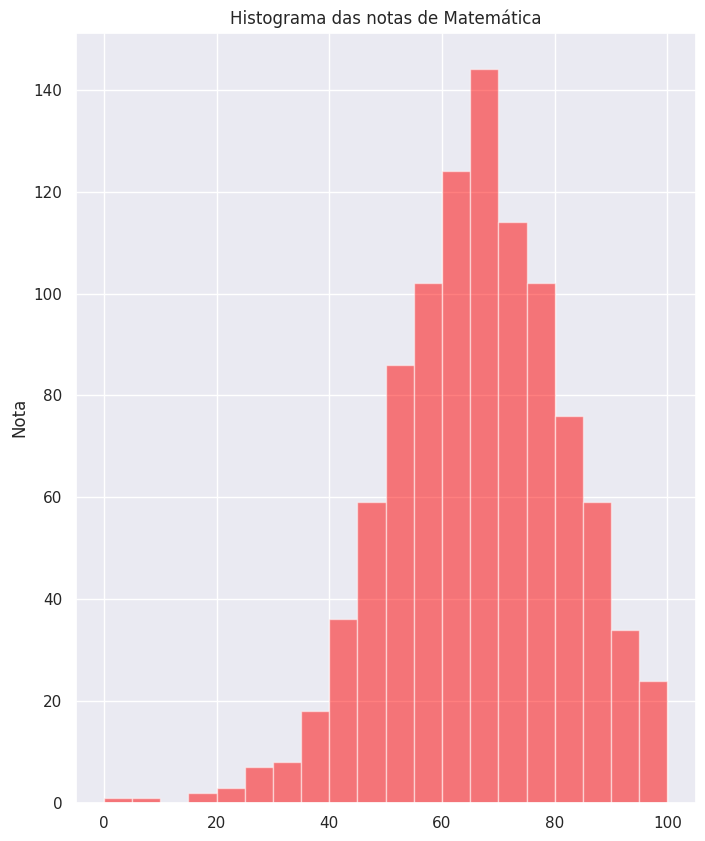

A classificação do histograma de notas de Matemática é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados


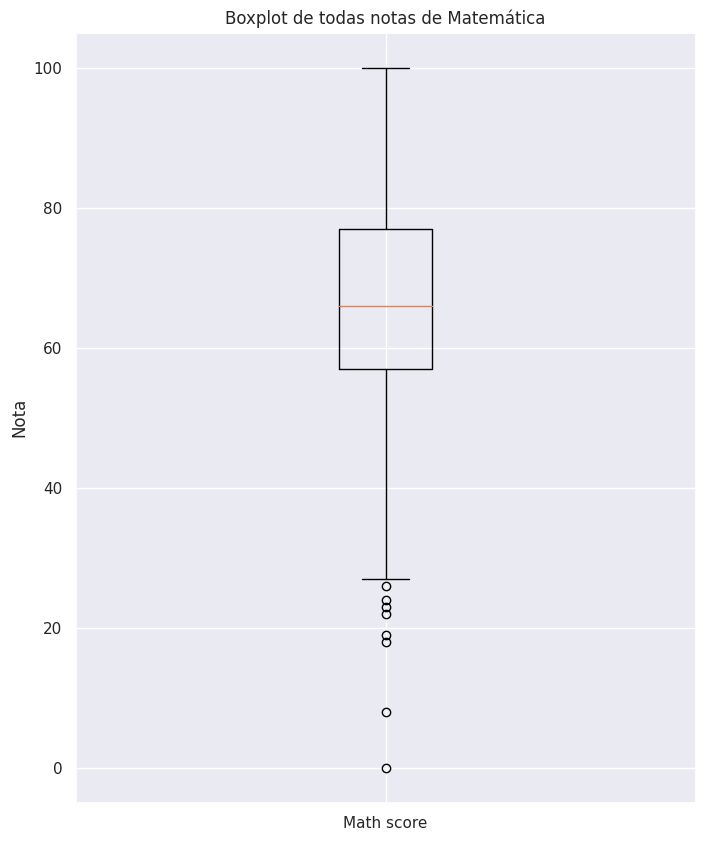

In [370]:
plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df_students['math score'], bins=20, color='red', alpha=0.5, label='Math score')
plt.title('Histograma das notas de Matemática')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas de Matemática é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados')

plt.boxplot([df_students['math score']], labels=['Math score'])
plt.title('Boxplot de todas notas de Matemática')
plt.ylabel('Nota')
plt.show()

In [371]:
# Retirando outliers com método IQR
q1_math, q3_math = df_students['math score'].quantile([0.25, 0.75])
iqr_math = q3_math - q1_math

limite_inferior_math = q1_math - 1.5 * iqr_math
limite_superior_math = q3_math + 1.5 * iqr_math

print(f'O primeiro quartil das notas de Matemática é {q1_math}')
print(f'O terceiro quartil das notas de Matemática é {q3_math}')
print(f'O limite inferior das notas de Matemática é {limite_inferior_math}')
print(f'O limite superior das notas de Matemática é {limite_superior_math}')

O primeiro quartil das notas de Matemática é 57.0
O terceiro quartil das notas de Matemática é 77.0
O limite inferior das notas de Matemática é 27.0
O limite superior das notas de Matemática é 107.0


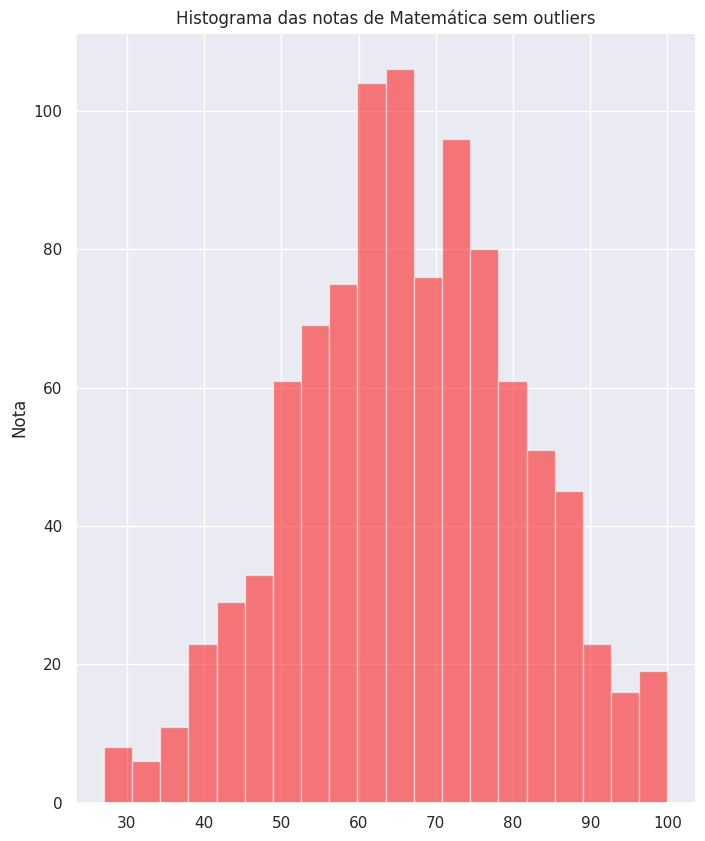

A classificação do histograma de notas de Matemática sem outliers é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados


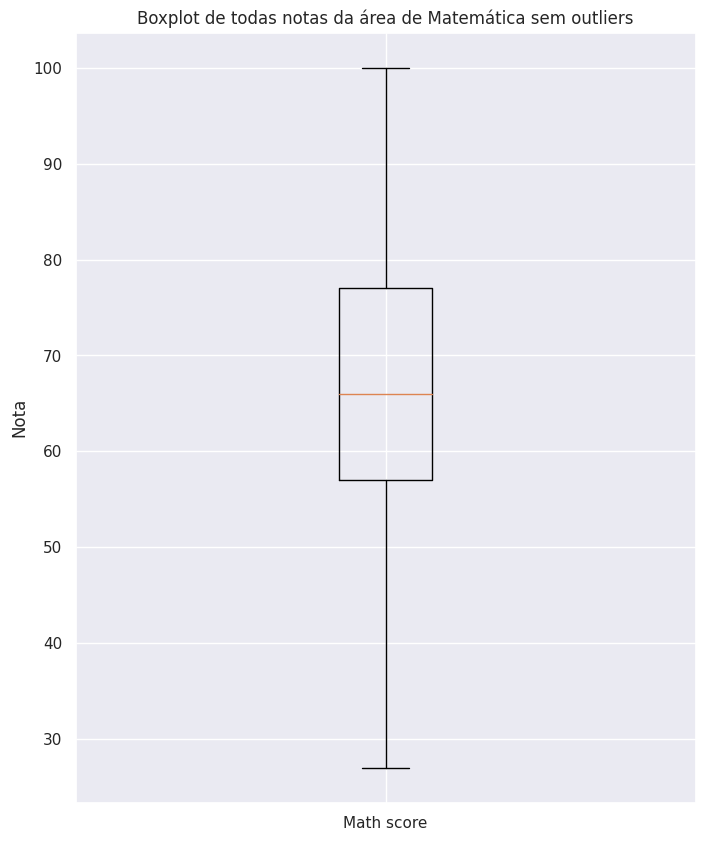

In [372]:
# DF sem outliers pelo métdodo IQR
df_no_outliers_math = df_students[(df_students['math score'] >= limite_inferior_math) & (df_students['math score'] <= limite_superior_math)]

plt.hist(df_no_outliers_math['math score'], bins=20, color='red', alpha=0.5, label='Math score')
plt.title('Histograma das notas de Matemática sem outliers')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas de Matemática sem outliers é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados')

plt.boxplot([df_no_outliers_math['math score']], labels=['Math score'])
plt.title('Boxplot de todas notas da área de Matemática sem outliers')
plt.ylabel('Nota')
plt.show()

In [373]:
# Comparativo da Média de Math scores com e sem outliers pelo método IQR
media_math = df_students[['math score']].mean().iloc[0]

media_no_outliers_math = df_no_outliers_math['math score'].describe().loc[['mean']].iloc[0]

dif_math = (media_math - media_no_outliers_math) / media_math * 100

print(f'A média das notas de Matemática com outliers é {media_math.round(2)}')
print(f'A média das notas de Matemática sem outliers é {media_no_outliers_math.round(2)}')
print(f'A diferença entre as médias é {dif_math.round(2)}% o que caracteriza como uma alteração NÃO estatisticamente significante maior que 5%')

A média das notas de Matemática com outliers é 66.09
A média das notas de Matemática sem outliers é 66.48
A diferença entre as médias é -0.59% o que caracteriza como uma alteração NÃO estatisticamente significante maior que 5%


o número de outliers encontrado em Math score foi de: 4


<Figure size 1000x500 with 0 Axes>

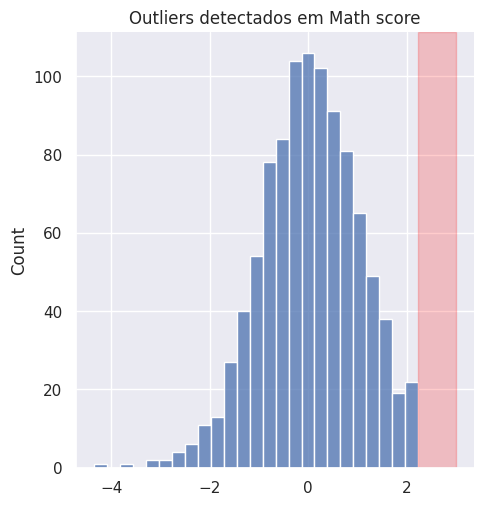

In [374]:
# Sobre outliers com método Zscore

outliers = []
zscore = []
threshold = 3
mean = np.mean(df_students['math score'])
std = np.std(df_students['math score'])
for i in df_students['math score'].values:
  z_score= (i - mean)/std
  zscore.append(z_score)
  if np.abs(z_score) > threshold:
      outliers.append(i)
print("o número de outliers encontrado em Math score foi de: " + str(len(outliers)))

if len(outliers) > 0:
    plt.figure(figsize = (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
    plt.title("Outliers detectados em Math score")
    plt.show()
else:
    print("Não foram encontrados outliers em Math score")

In [375]:
count = df_students.isna().sum()
print(count)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [376]:
# DF sem outliers pelo métdodo Zscore
# (O método z-score utiliza como referencia a quantos desvios padrões a informação está da média. Se Z-score > 3 desvios padroes geralmente se pode considerar um outlier).

def replace_na_outlier_zscore(dataset, threshold, colname):
  ### funcao que faz um replace para NaN (valor nulo) caso seja encontrado um outlier
    df = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(df)
    std = np.std(df)
    for i in df.values:
      z_score= (i - mean)/std
      zscore.append(z_score)
      if np.abs(z_score) > threshold:
          outliers.append(i)
          val.append(np.nan)
      else:
          val.append(i)

    return val

def drop_outliers(dataset, threshold, column):
  ### vamos utilizar a funcao drop NA para remover outliers
  dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.dropna()

df_z = df_students.copy()
df_no_outliers_zscore = drop_outliers(df_z, 3, 'math score')
count_na_post_zscore = df_no_outliers_zscore.isna().sum()
print(count_na_post_zscore)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


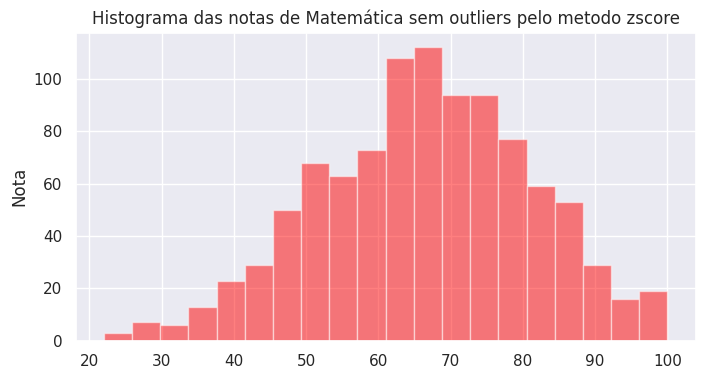

A classificação do histograma de notas de Matemática sem outliers pelo método z score é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados


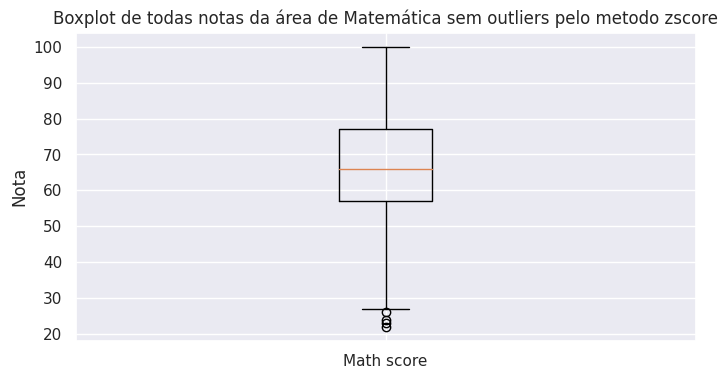

In [395]:
plt.hist(df_no_outliers_zscore['math score'], bins=20, color='red', alpha=0.5, label='Math score')
plt.title('Histograma das notas de Matemática sem outliers pelo metodo zscore')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas de Matemática sem outliers pelo método z score é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados')

plt.boxplot([df_no_outliers_zscore['math score']], labels=['Math score'])
plt.title('Boxplot de todas notas da área de Matemática sem outliers pelo metodo zscore')
plt.ylabel('Nota')
plt.show()

In [393]:
# DF sem outliers pelo métdodo Zscore com troca dos NaNs pela mediana

def replace_median_outliers(dataset, threshold, column):
  ### vamos utilizar a funcao fillna para trocar os NaNs pela mediana
  dataset[column] =  replace_na_outlier_zscore(dataset, 3, column)
  return dataset.fillna(dataset[column].median())

df_z = df_students.copy()
df_no_outliers_zscore_median = replace_median_outliers(df_z, 3, 'math score')
count_na_median_zscore = df_no_outliers_zscore_median.isna().sum()
print(count_na_median_zscore)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


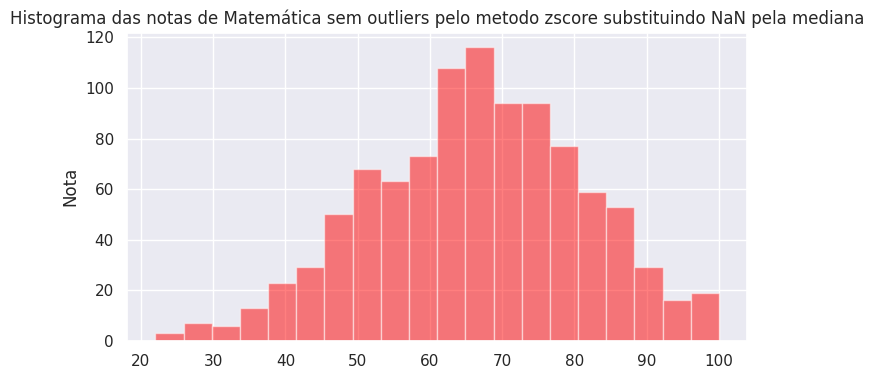

A classificação do histograma de notas de Matemática sem outliers pelo método z score substituindo NaN pela mediana é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados


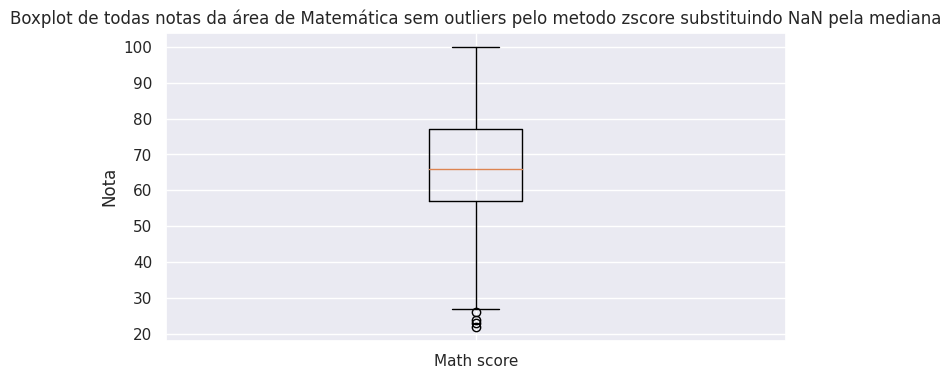

In [394]:
plt.hist(df_no_outliers_zscore_median['math score'], bins=20, color='red', alpha=0.5, label='Math score')
plt.title('Histograma das notas de Matemática sem outliers pelo metodo zscore substituindo NaN pela mediana')
plt.ylabel('Nota')
plt.show()
print('A classificação do histograma de notas de Matemática sem outliers pelo método z score substituindo NaN pela mediana é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados')

plt.boxplot([df_no_outliers_zscore_median['math score']], labels=['Math score'])
plt.title('Boxplot de todas notas da área de Matemática sem outliers pelo metodo zscore substituindo NaN pela mediana')
plt.ylabel('Nota')
plt.show()

In [379]:
# Comparativo da Média de Math scores com e sem outliers pelo método Zscore

media_math = df_students[['math score']].mean().iloc[0]

media_no_outliers_z = df_no_outliers_zscore['math score'].describe().loc[['mean']].iloc[0]
dif_math_z = (media_math - media_no_outliers_z) / media_math * 100

print(f'A média das notas de Matemática com outliers é {media_math.round(2)}')
print(f'A média das notas de Matemática sem outliers pelo metodo z score  é {media_no_outliers_z.round(2)}')
print(f'A diferença entre as médias é {dif_math_z.round(2)}% o que caracteriza como uma alteração NÃO estatisticamente significante maior que 5%')

media_no_outliers_z_median = df_no_outliers_zscore_median['math score'].describe().loc[['mean']].iloc[0]
dif_math_z_median = (media_math - media_no_outliers_z_median) / media_math * 100

print(f'A média das notas de Matemática com outliers é {media_math.round(2)}')
print(f'A média das notas de Matemática sem outliers pelo metodo z score substituindo NaN pela mediana é {media_no_outliers_math.round(2)}')
print(f'A diferença entre as médias é {dif_math_z_median.round(2)}% o que caracteriza como uma alteração NÃO estatisticamente significante maior que 5%')

A média das notas de Matemática com outliers é 66.09
A média das notas de Matemática sem outliers pelo metodo z score  é 66.31
A diferença entre as médias é -0.33% o que caracteriza como uma alteração NÃO estatisticamente significante maior que 5%
A média das notas de Matemática com outliers é 66.09
A média das notas de Matemática sem outliers pelo metodo z score substituindo NaN pela mediana é 66.48
A diferença entre as médias é -0.33% o que caracteriza como uma alteração NÃO estatisticamente significante maior que 5%


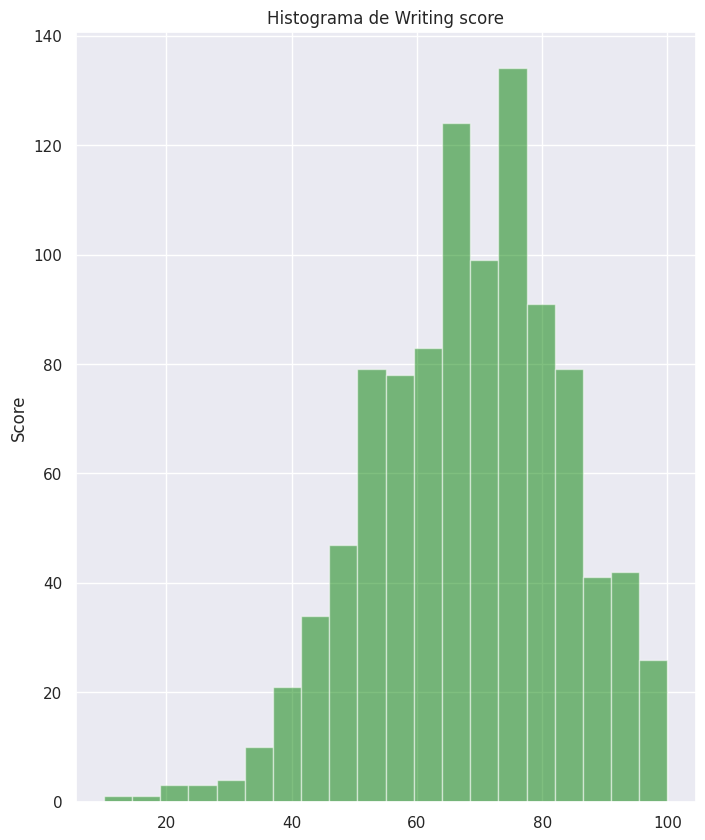

A classificação do histograma de Writing score é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados


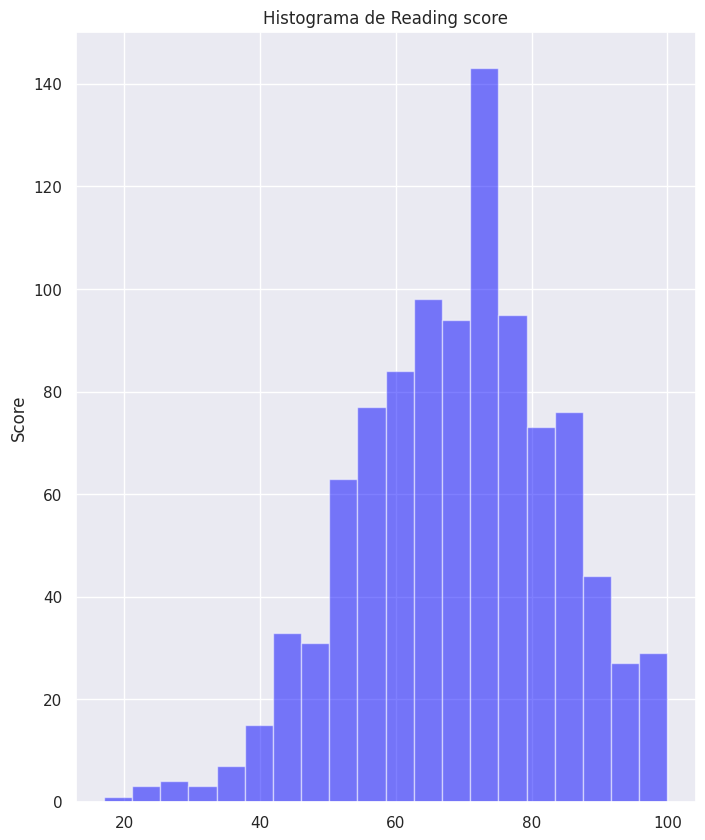

A classificação do histograma de Reading score é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados


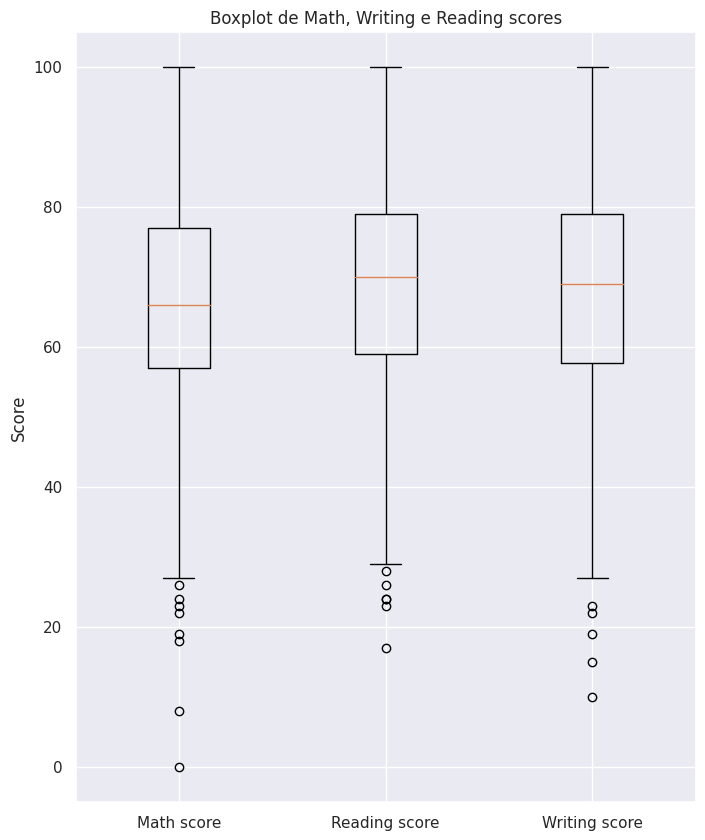

In [380]:
# Outras análises para reading e writing scores

plt.rcParams['figure.figsize'] = [8, 10]

plt.hist(df_students['writing score'], bins=20, color='green', alpha=0.5, label='Writing score')
plt.title('Histograma de Writing score')
plt.ylabel('Score')
plt.show()
print('A classificação do histograma de Writing score é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados')


plt.hist(df_students['reading score'], bins=20, color='blue', alpha=0.5, label='Reading score')
plt.title('Histograma de Reading score')
plt.ylabel('Score')
plt.show()
print('A classificação do histograma de Reading score é SIMÉTRICO devido as notas estarem distribuídas na mesma medida para ambos os lados')


plt.boxplot([df_students['math score'], df_students['reading score'], df_students['writing score']], labels=['Math score', 'Reading score','Writing score'])
plt.title('Boxplot de Math, Writing e Reading scores')
plt.ylabel('Score')
plt.show()

In [381]:
# Sugestões

# Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?
# Faça a mesma análise para as notas de leitura e escrita.

df_students.groupby(['parental level of education'])[['math score', 'reading score', 'writing score']].agg(['mean', 'std', 'median', pd.Series.mode])

math score                                  \
                                  mean        std median          mode   
parental level of education                                              
associate's degree           67.882883  15.112093   67.0            65   
bachelor's degree            69.389831  14.943789   68.0  [63, 65, 66]   
high school                  62.137755  14.539651   63.0      [57, 66]   
master's degree              69.745763  15.153915   73.0      [79, 81]   
some college                 67.128319  14.312897   67.5            69   
some high school             63.497207  15.927989   65.0      [59, 65]   

                            reading score                                  \
                                     mean        std median          mode   
parental level of education                                                 
associate's degree              70.927928  13.868948   72.5            76   
bachelor's degree               73.000000  14.285250   73.0           100   
high school                     64.704082  14.132130   66.0      [52, 72]   
master's degree                 75.372881  13.775163   76.0            81   
some college                    69.460177  14.057049   70.5  [64, 74, 78]   
some high school                66.938547  15.479295   67.0      [67, 84]   

                            writing score                                   
                                     mean        std median           mode  
parental level of education                                                 
associate's degree              69.896396  14.311122   70.5             73  
bachelor's degree               73.381356  14.728262   74.0      [81, 100]  
high school                     62.448980  14.085907   64.0             68  
master's degree                 75.677966  13.730711   75.0  [75, 84, 100]  
some college                    68.840708  15.012331   70.0             70  
some high school                64.888268  15.736197   66.0             78

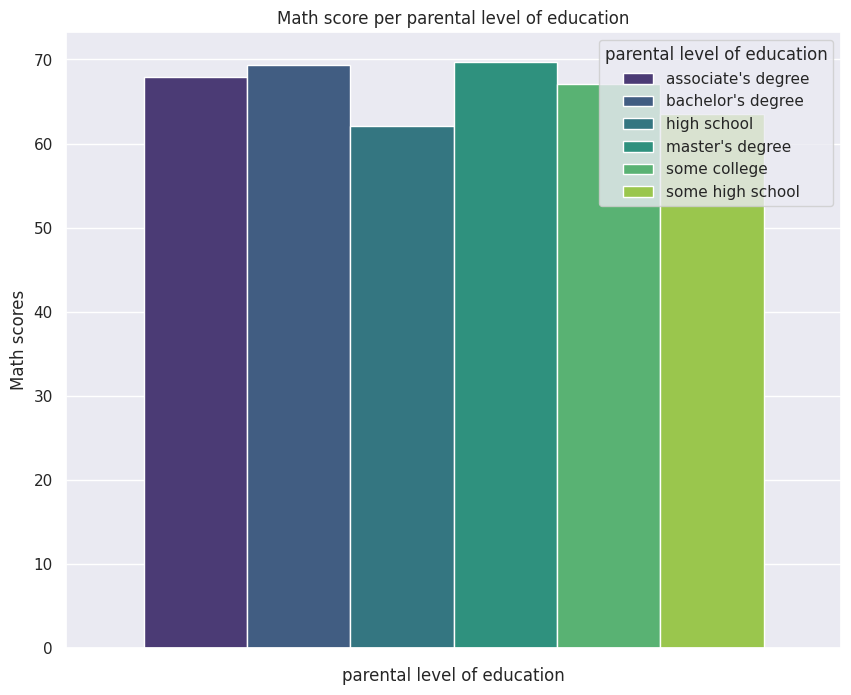

In [382]:
plt.figure(figsize=(10, 8))
sns.barplot(hue='parental level of education', y='math score', data=df_students.groupby('parental level of education')['math score'].mean().reset_index(), palette='viridis')
plt.title('Math score per parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('Math scores')
plt.xticks(rotation=30)
plt.show()

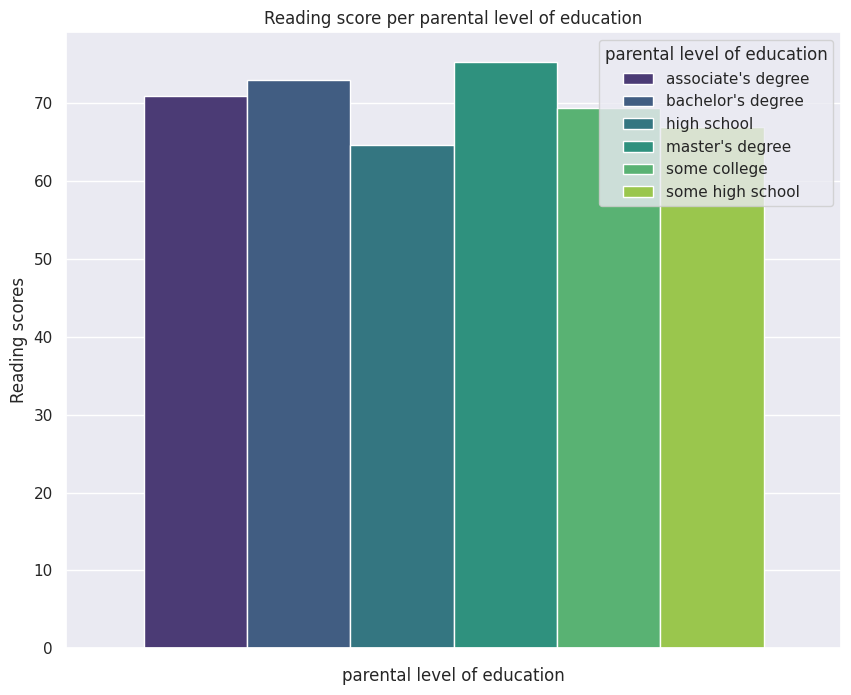

In [383]:
plt.figure(figsize=(10, 8))
sns.barplot(hue='parental level of education', y='reading score', data=df_students.groupby('parental level of education')['reading score'].mean().reset_index(), palette='viridis')
plt.title('Reading score per parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('Reading scores')
plt.xticks(rotation=30)
plt.show()

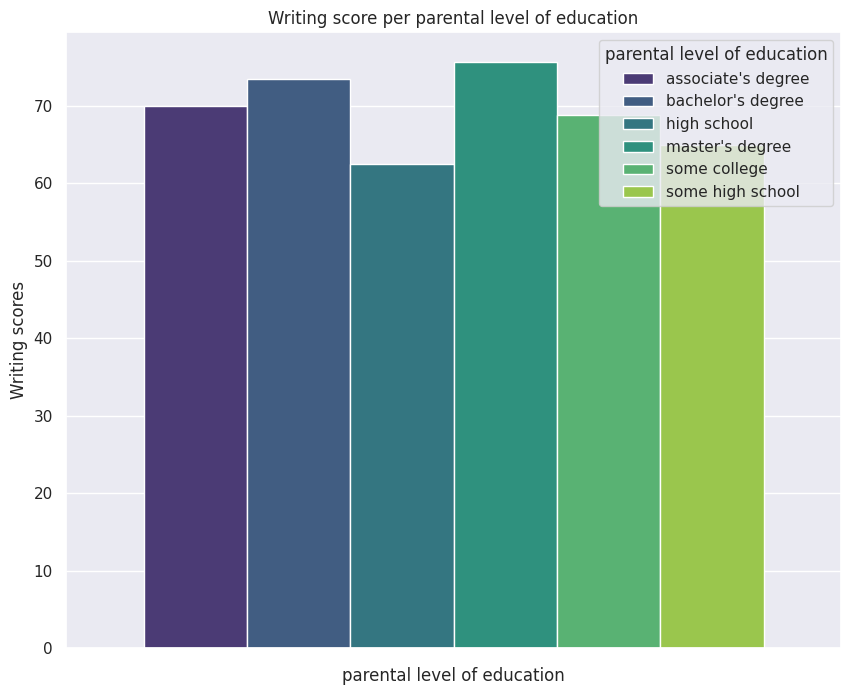

In [384]:
plt.figure(figsize=(10, 8))
sns.barplot(hue='parental level of education', y='writing score', data=df_students.groupby('parental level of education')['writing score'].mean().reset_index(), palette='viridis')
plt.title('Writing score per parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('Writing scores')
plt.xticks(rotation=30)
plt.show()

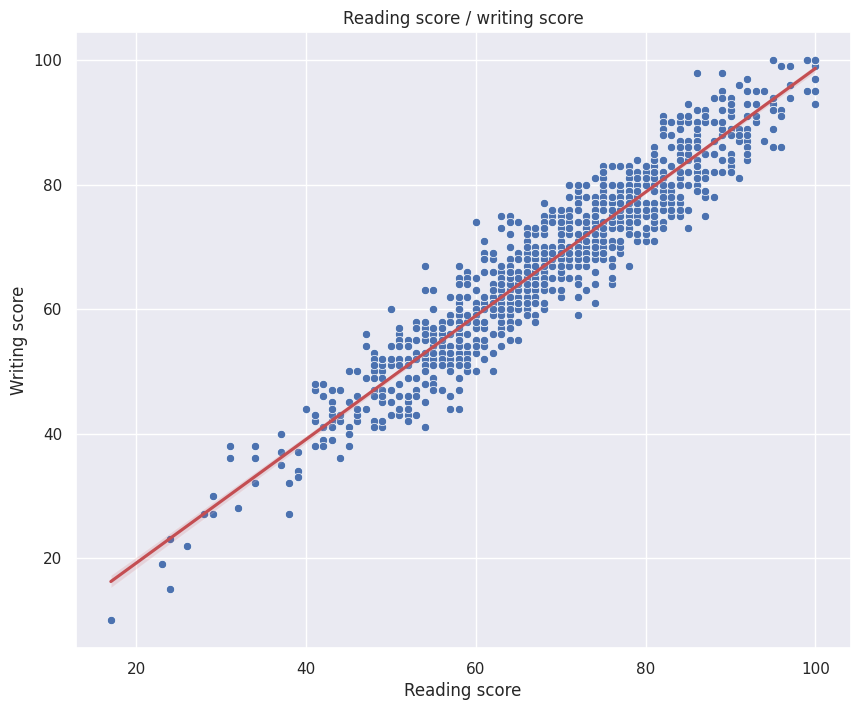

In [385]:
# Sugestões

# Verifique gráficamente a relação da nota de leitura e de escrita.

plt.figure(figsize=(10, 8))
sns.scatterplot(x='reading score', y='writing score', data=df_students, marker='o', color='b')
sns.regplot(x='reading score', y='writing score', data=df_students, scatter=False, color='r')
plt.title('Reading score / writing score')
plt.xlabel('Reading score')
plt.ylabel('Writing score')
plt.show()

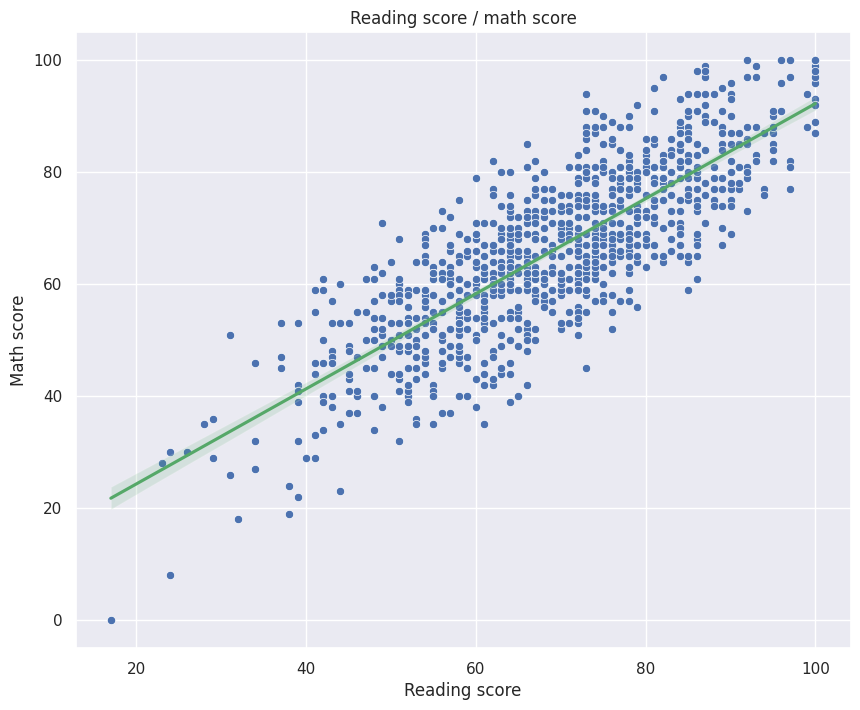

In [386]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='reading score', y='math score', data=df_students, marker='o', color='b')
sns.regplot(x='reading score', y='math score', data=df_students, scatter=False, color='g')
plt.title('Reading score / math score')
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.show()

In [387]:
gender_mean = df_students.groupby(['gender'])[['math score', 'reading score', 'writing score']].agg(['mean'])
gender_mean

,math score,reading score,writing score
,mean,mean,mean
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


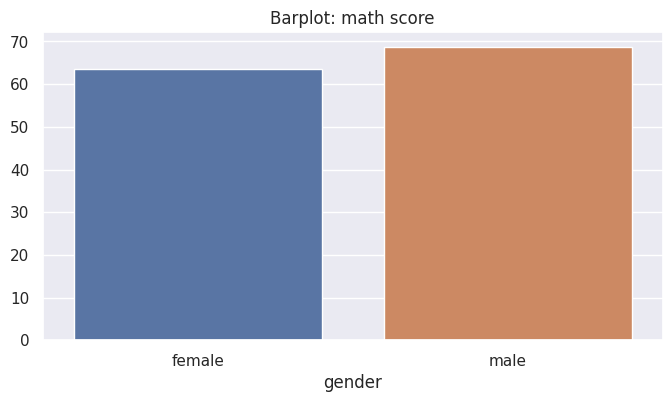

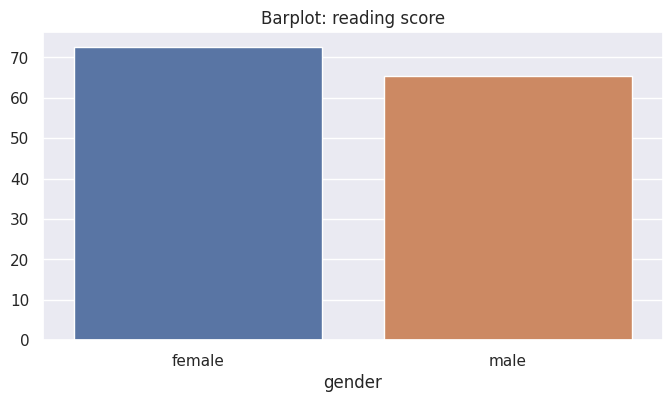

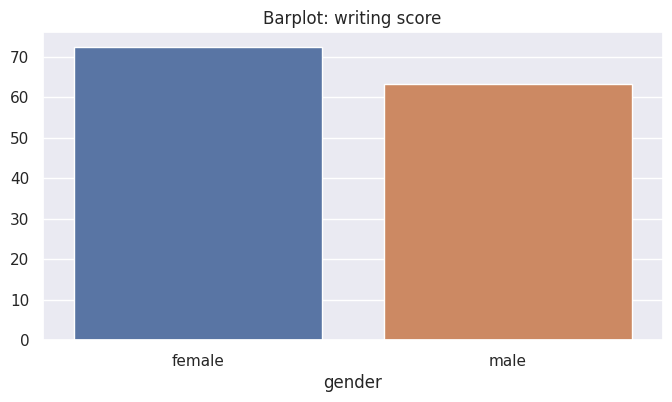

In [388]:
# Exercícios extras

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
for column in gender_mean.select_dtypes(include=np.number).columns:
    plt.figure()
    mean_values = gender_mean[column].values.flatten()
    sns.barplot(data = gender_mean.reset_index(), x = 'gender', y = mean_values, hue = 'gender')
    plt.title("Barplot: "+column[0])

# plt.rcParams['figure.figsize'] = [8, 4]
# gender_math_mean = df_students.groupby(['gender'])[['math score']].agg(['mean'])
# gender_math_labels = gender_math_mean.index
# gender_math_colors = ['red', 'blue']
# mean_math_scores = gender_math_mean.values.flatten()
# plt.bar(gender_math_labels, mean_math_scores, alpha=0.5, label='Math score', color=gender_math_colors)
# plt.title('Bar plot de Math score por gênero')
# plt.ylabel('Score')
# plt.show()

# gender_read_mean = df_students.groupby(['gender'])[['reading score']].agg(['mean'])
# gender_read_labels = gender_read_mean.index
# gender_read_colors = ['red', 'blue']
# mean_read_scores = gender_read_mean.values.flatten()
# plt.bar(gender_read_labels, mean_read_scores, alpha=0.5, label='Reading score', color=gender_read_colors)
# plt.title('Bar plot de Reading score por gênero')
# plt.ylabel('Score')
# plt.show()

# gender_write_mean = df_students.groupby(['gender'])[['writing score']].agg(['mean'])
# gender_write_labels = gender_write_mean.index
# gender_write_colors = ['red', 'blue']
# mean_write_scores = gender_write_mean.values.flatten()
# plt.bar(gender_write_labels, mean_write_scores, alpha=0.5, label='Writing score', color=gender_write_colors)
# plt.title('Bar plot de Writing score por gênero')
# plt.ylabel('Score')
# plt.show()

In [389]:
race_mean = df_students.groupby(['race/ethnicity'])[['math score', 'reading score', 'writing score']].agg(['mean'])
race_mean

,math score,reading score,writing score
,mean,mean,mean
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


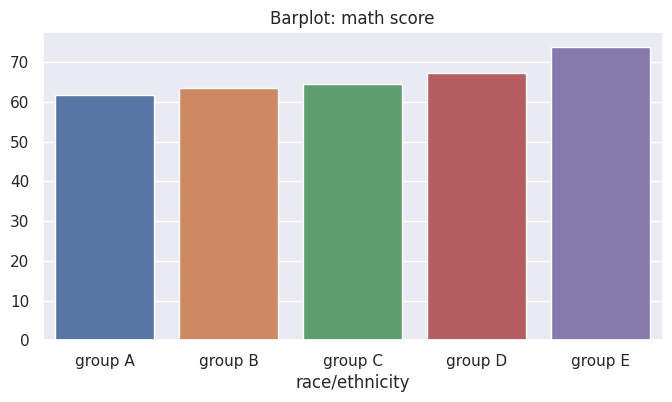

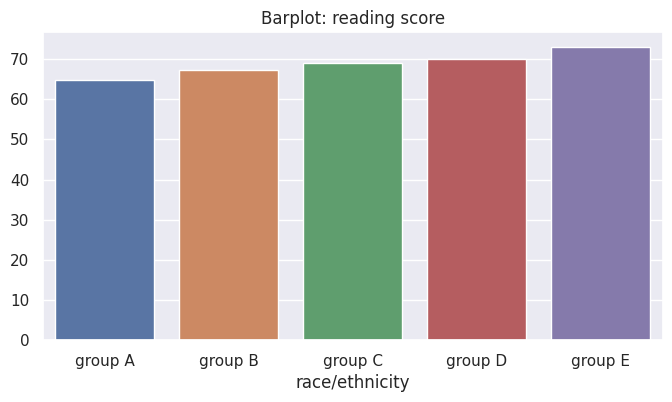

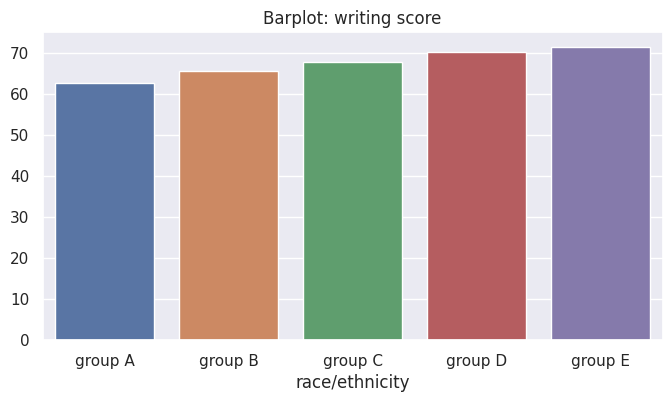

In [390]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
for column in race_mean.select_dtypes(include=np.number).columns:
    plt.figure()
    mean_values = race_mean[column].values.flatten()
    sns.barplot(data = race_mean.reset_index(), x = 'race/ethnicity', y = mean_values, hue = 'race/ethnicity')
    plt.title("Barplot: "+column[0])


# raca_read_mean = df_students.groupby(['race/ethnicity'])[['reading score']].agg(['mean'])
# raca_mean_read_labels = raca_read_mean.index
# raca_read_colors = ['blue', 'yellow', 'green', 'red', 'black']
# mean_read_scores = raca_read_mean.values.flatten()
# plt.bar(raca_mean_read_labels, mean_read_scores, alpha=0.5, label='Reading score', color=raca_read_colors)
# plt.title('Bar plot de Reading score por race/ethnicity')
# plt.ylabel('Score')
# plt.show()

# raca_math_mean = df_students.groupby(['race/ethnicity'])[['math score']].agg(['mean'])
# raca_math_labels = raca_math_mean.index
# raca_math_colors = ['blue', 'yellow', 'green', 'red', 'black']
# mean_math_scores = raca_math_mean.values.flatten()
# plt.bar(raca_math_labels, mean_math_scores, alpha=0.5, label='Math score', color=raca_math_colors)
# plt.title('Bar plot de Math score por race/ethnicity')
# plt.ylabel('Score')
# plt.show()

# raca_write_mean = df_students.groupby(['race/ethnicity'])[['writing score']].agg(['mean'])
# raca_write_labels = raca_math_mean.index
# raca_write_colors = ['blue', 'yellow', 'green', 'red', 'black']
# mean_write_scores = raca_write_mean.values.flatten()
# plt.bar(raca_write_labels, mean_write_scores, alpha=0.5, label='Writing score', color=raca_write_colors)
# plt.title('Bar plot de Writing score por race/ethnicity')
# plt.ylabel('Score')
# plt.show()

<Figure size 800x1000 with 0 Axes>

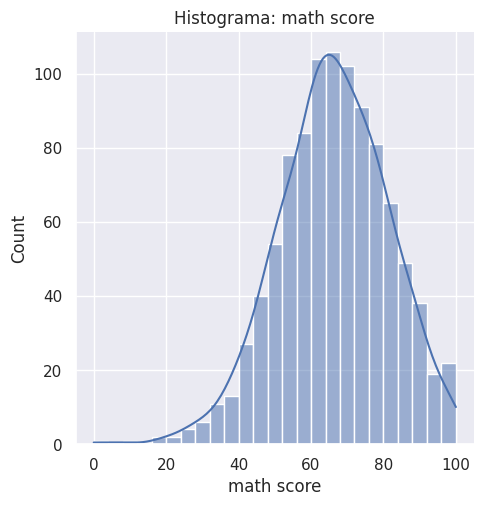

<Figure size 800x1000 with 0 Axes>

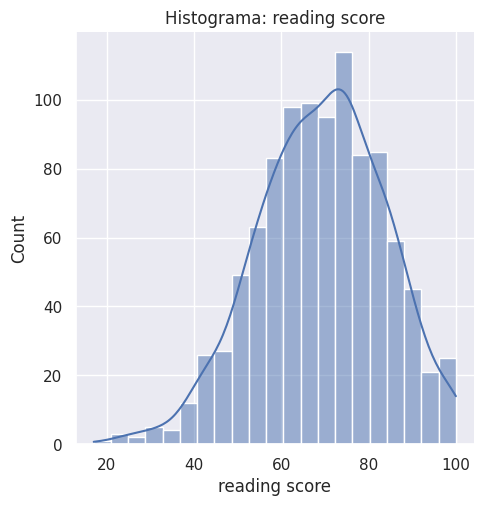

<Figure size 800x1000 with 0 Axes>

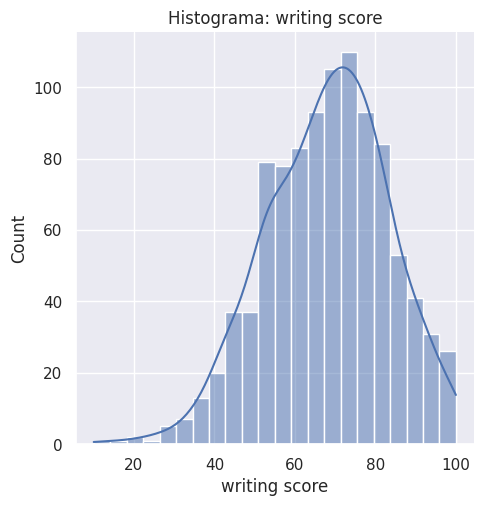

In [391]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
for column in df_students.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = df_students , x = column, kde= True)
    plt.title("Histograma: "+column)

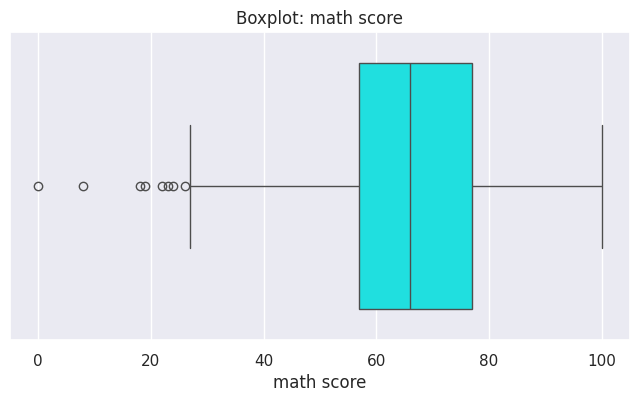

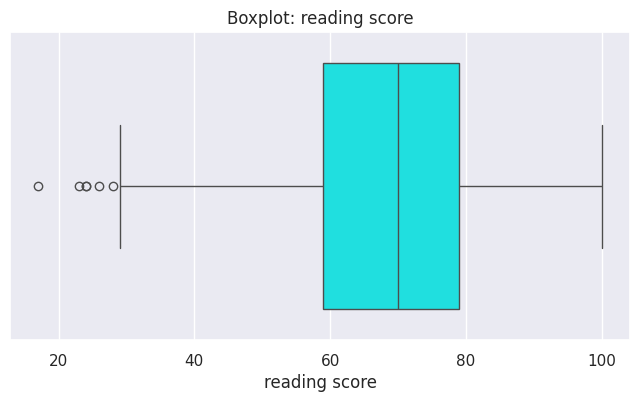

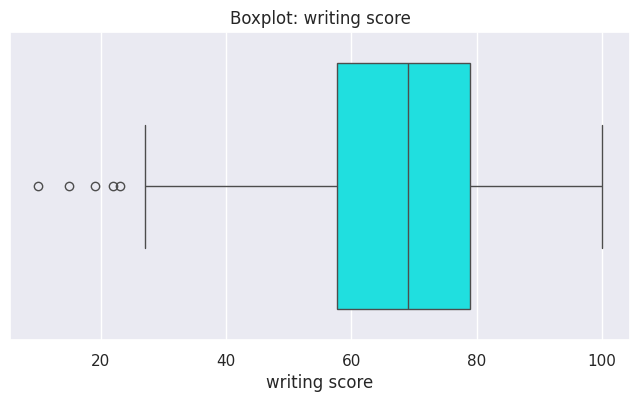

In [392]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()
for column in df_students.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = df_students , x = column, color='cyan',showfliers=True)
    plt.title("Boxplot: "+column)